The movies industry like everything is affected by the trend and the audience

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
movies = pd.read_csv('./processed/metadata.csv')
movies.columns

Index(['movie_id', 'title', 'release_date', 'popularity', 'budget', 'revenue',
       'vote_average', 'vote_count'],
      dtype='object')

In [73]:
movies.dtypes

movie_id          int64
title            object
release_date     object
popularity      float64
budget            int64
revenue         float64
vote_average    float64
vote_count      float64
dtype: object

In [74]:
movies.release_date = pd.to_datetime(movies.release_date)
movies.release_date.max()

Timestamp('2017-12-27 00:00:00')

In [75]:
genres = pd.read_csv('./processed/genres.csv')

In [76]:
movies = pd.merge(movies, genres, how= 'inner', on= 'movie_id')
movies.head()

,movie_id,title,release_date,popularity,budget,revenue,vote_average,vote_count,genre_id,genre
0,862,Toy Story,1995-10-30,21.946943,30000000,373554033.0,7.7,5415.0,16,Animation
1,862,Toy Story,1995-10-30,21.946943,30000000,373554033.0,7.7,5415.0,35,Comedy
2,862,Toy Story,1995-10-30,21.946943,30000000,373554033.0,7.7,5415.0,10751,Family
3,8844,Jumanji,1995-12-15,17.015539,65000000,262797249.0,6.9,2413.0,12,Adventure
4,8844,Jumanji,1995-12-15,17.015539,65000000,262797249.0,6.9,2413.0,14,Fantasy


In [77]:
movies['release_year'] = movies.release_date.dt.year

In [78]:
movies['profit'] = movies['revenue'] - movies['budget']

In [79]:
trend_agg = movies.groupby(['release_year', 'genre'], as_index= False) \
    .agg({'budget': ['sum', 'mean', 'count'], 'revenue': ['sum', 'mean', 'count'], \
        'vote_average': ['mean'], 'popularity': ['mean']})

trend_agg


release_year            genre      budget                      \
                                           sum          mean count   
0          1874.0      Documentary           0  0.000000e+00     1   
1          1878.0      Documentary           0  0.000000e+00     1   
2          1883.0      Documentary           0  0.000000e+00     1   
3          1887.0      Documentary           0  0.000000e+00     1   
4          1888.0      Documentary           0  0.000000e+00     2   
...           ...              ...         ...           ...   ...   
2000       2017.0  Science Fiction  1512708182  2.801311e+07    54   
2001       2017.0         TV Movie     4000000  3.333333e+05    12   
2002       2017.0         Thriller  1369757200  1.292224e+07   106   
2003       2017.0              War   444749148  2.616171e+07    17   
2004       2017.0          Western    70500000  2.350000e+07     3   

           revenue                     vote_average popularity  
               sum          mean count         mean       mean  
0     0.000000e+00  0.000000e+00     1     6.000000   0.480371  
1     0.000000e+00  0.000000e+00     1     6.200000   0.327841  
2     0.000000e+00  0.000000e+00     1     5.400000   0.229221  
3     0.000000e+00  0.000000e+00     1     4.100000   1.184891  
4     0.000000e+00  0.000000e+00     2     5.150000   0.851594  
...            ...           ...   ...          ...        ...  
2000  3.329743e+09  6.166190e+07    54     5.911111  22.332425  
2001  0.000000e+00  0.000000e+00    12     5.916667   5.108619  
2002  4.188216e+09  3.951147e+07   106     5.806604  15.236896  
2003  1.139560e+09  6.703292e+07    17     6.864706  18.780453  
2004  9.644294e+07  3.214765e+07     3     6.166667  35.212375  

[2005 rows x 10 columns]

In [80]:
trend_agg.isna().sum()

release_year           0
genre                  0
budget        sum      0
              mean     0
              count    0
revenue       sum      0
              mean     0
              count    0
vote_average  mean     0
popularity    mean     0
dtype: int64

from previeous analysis we saw the some years have no data aboout revenue nor budget 

In [81]:
((movies.budget > 0) & (movies.revenue > 0)).sum() , len(movies)

(14042, 90479)

Only 15K rows have critical information to our investgation, so we will focus on them 

In [82]:
movies = movies[(movies.budget > 0) & (movies.revenue > 0)]

In [83]:
trend_agg = movies.groupby(['release_year', 'genre'], as_index= False) \
    .agg({'budget': ['count', 'sum', 'mean'], 'revenue': ['sum', 'mean'], \
        'vote_average': ['mean'], 'popularity': ['mean'], 'profit': ['sum', 'mean']})

In [84]:
trend_agg.head(10)

release_year            genre budget                       revenue  \
                                 count     sum      mean         sum   
0       1915.0            Drama      2  117311   58655.5  11137365.0   
1       1915.0          History      1  100000  100000.0  11000000.0   
2       1915.0              War      1  100000  100000.0  11000000.0   
3       1916.0           Action      1  200000  200000.0   8000000.0   
4       1916.0        Adventure      1  200000  200000.0   8000000.0   
5       1916.0            Drama      1  200000  200000.0   8000000.0   
6       1916.0  Science Fiction      1  200000  200000.0   8000000.0   
7       1918.0           Comedy      1  250000  250000.0   8000000.0   
8       1918.0            Drama      1  250000  250000.0   8000000.0   
9       1921.0           Comedy      1  250000  250000.0   2500000.0   

              vote_average popularity      profit              
         mean         mean       mean         sum        mean  
0   5568682.5          5.6   2.896806  11020054.0   5510027.0  
1  11000000.0          6.4   5.113205  10900000.0  10900000.0  
2  11000000.0          6.4   5.113205  10900000.0  10900000.0  
3   8000000.0          6.0   0.917777   7800000.0   7800000.0  
4   8000000.0          6.0   0.917777   7800000.0   7800000.0  
5   8000000.0          6.0   0.917777   7800000.0   7800000.0  
6   8000000.0          6.0   0.917777   7800000.0   7800000.0  
7   8000000.0          7.5   0.211008   7750000.0   7750000.0  
8   8000000.0          7.5   0.211008   7750000.0   7750000.0  
9   2500000.0          8.0   8.168456   2250000.0   2250000.0

In [85]:
movies[(movies.release_year == 1915) & (movies.genre == 'Drama')]

,movie_id,title,release_date,popularity,budget,revenue,vote_average,vote_count,genre_id,genre,release_year,profit
16584,618,The Birth of a Nation,1915-02-08,5.113205,100000,11000000.0,6.4,109.0,18,Drama,1915.0,10900000.0
19891,70368,The Cheat,1915-12-13,0.680407,17311,137365.0,4.8,11.0,18,Drama,1915.0,120054.0


In [86]:
len(genres.genre.unique()), genres.genre.unique()

(20,
 array(['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance',
        'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
        'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music',
        'Documentary', 'Western', 'TV Movie'], dtype=object))

There are too many genres for the sake of our analysis.
the booming of Sci-Fi and animation is vivid during the late 1990s, so I am marking the year 1990 as my starting point for the analysis.


In [87]:
trend_agg = trend_agg[trend_agg.release_year > 1990]

In [88]:
len(trend_agg[trend_agg.release_year > 1990].release_year.unique())

27

we will analyse the data from 1991 to 2017

In [90]:
# refining grouped data
trend_agg.columns = trend_agg.columns.to_flat_index()
trend_agg.columns = ['release_year', 'genre', 'num_movies',\
    'budget_total', 'budget_average', 'revenue_total', 'revenue_average',\
    'vote_average', 'popularity_average', 'profit_total', 'profit_average']

In [92]:
trend_agg

,release_year,genre,num_movies,budget_total,budget_average,revenue_total,revenue_average,vote_average,popularity_average,profit_total,profit_average
727,1991.0,Action,25,688000000,2.752000e+07,1.656878e+09,6.627511e+07,5.904000,8.854695,9.688778e+08,3.875511e+07
728,1991.0,Adventure,12,391000000,3.258333e+07,1.216812e+09,1.014010e+08,6.016667,9.763608,8.258117e+08,6.881764e+07
729,1991.0,Animation,2,43000000,2.150000e+07,3.890079e+08,1.945040e+08,6.400000,13.517771,3.460079e+08,1.730040e+08
730,1991.0,Comedy,32,631316000,1.972862e+07,1.474675e+09,4.608359e+07,6.053125,6.761597,8.433589e+08,2.635497e+07
731,1991.0,Crime,15,333010000,2.220067e+07,1.277841e+09,8.518939e+07,6.413333,8.328881,9.448309e+08,6.298872e+07
...,...,...,...,...,...,...,...,...,...,...,...
1207,2017.0,Romance,8,347845300,4.348066e+07,1.685507e+09,2.106884e+08,6.562500,50.033256,1.337662e+09,1.672077e+08
1208,2017.0,Science Fiction,14,1422271676,1.015908e+08,3.326604e+09,2.376146e+08,6.357143,58.475621,1.904333e+09,1.360238e+08
1209,2017.0,Thriller,23,1259400000,5.475652e+07,4.184887e+09,1.819516e+08,6.208696,34.011323,2.925487e+09,1.271951e+08
1210,2017.0,War,6,362745300,6.045755e+07,1.132757e+09,1.887928e+08,6.866667,36.821993,7.700113e+08,1.283352e+08


<Axes: xlabel='release_year', ylabel='num_movies'>

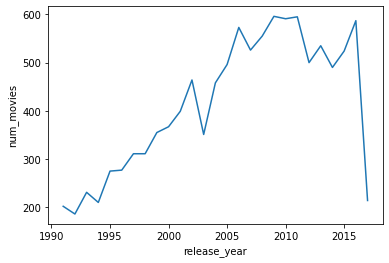

In [93]:
movie_peryear = movies[movies.release_year > 1990]\
    .groupby('release_year', as_index= False).count()
movie_peryear = movie_peryear.filter(['release_year', 'movie_id'])
movie_peryear.rename(columns= {'movie_id': 'num_movies'}, inplace= True)

sns.lineplot(x= movie_peryear.release_year, y= movie_peryear.num_movies)

2017 data is not complete, yet it is the most recent data

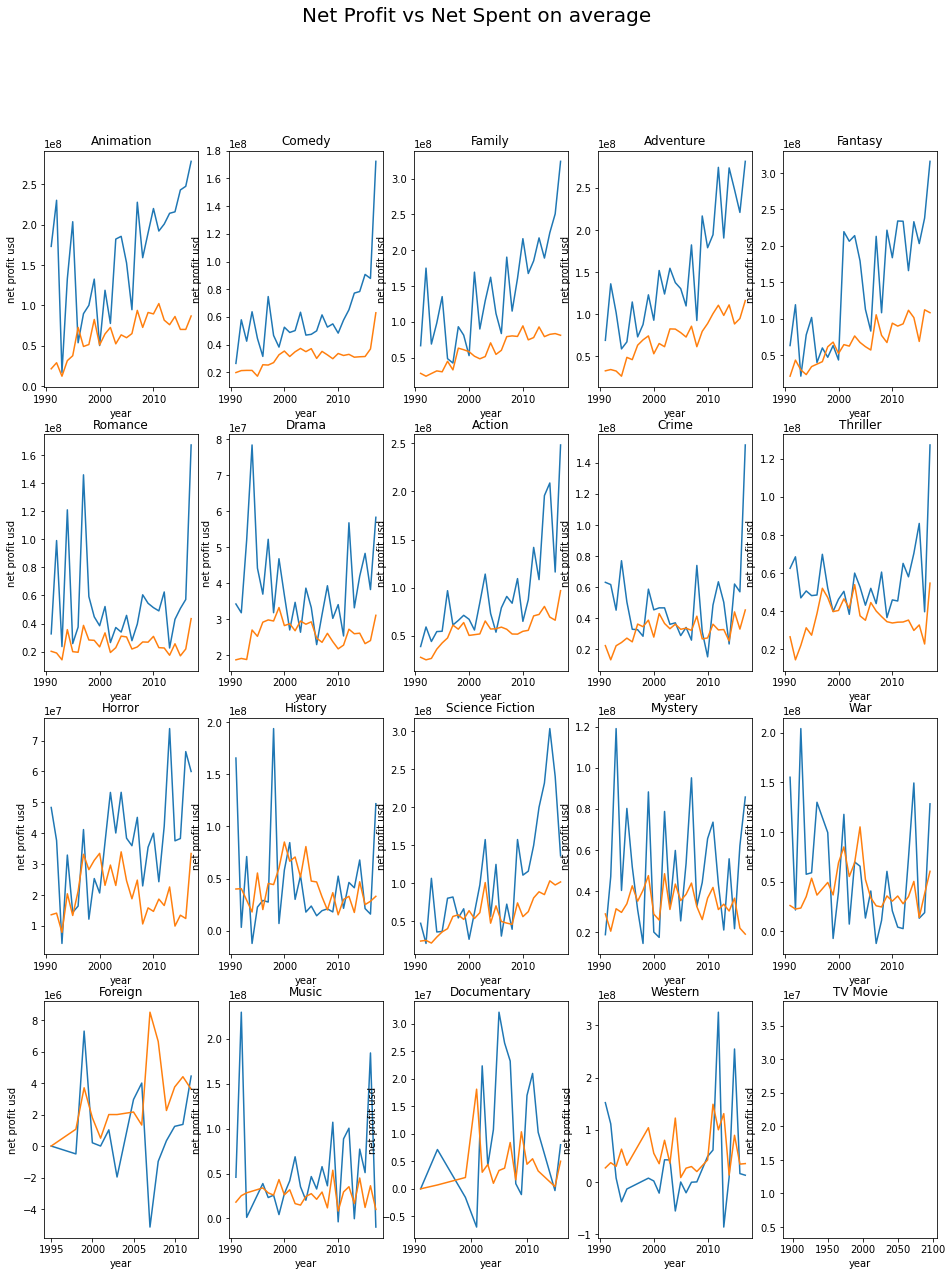

In [112]:
#define plotting region (4 rows, 5 columns)
fig, axes = plt.subplots(4, 5, figsize= (16,20))

plt.suptitle('Net Profit vs Net Spent on average', fontsize= 20)

genres_names = list(genres.genre.unique()) 
g_index = 0
for i in range(4):
    for j in range(5):
        g = genres_names[g_index]
        df = trend_agg[trend_agg.genre == g]
        axes[i, j].set_xlabel('year')
        axes[i, j].set_ylabel('net profit usd')
        axes[i, j].set_title(g)
        sns.lineplot(x= df.release_year, y= df.profit_average, ax= axes[i,j])
        sns.lineplot(x= df.release_year, y= df.budget_average, ax= axes[i,j])
        g_index += 1

There are notable meaningful obsevations in these 2 groups
1. Animation, Adventure, Fantasy and Science Fiction are the most lucrative 
2. Action is not far behind these genres 
3. Drama, Comedy, Romance and Musical are important genres yet the turnout does not compare well with others
4. Documanetary and Foreign movies are not attracting to audience in theatres

getting the average of each genre in each year will give us a better view of the trend

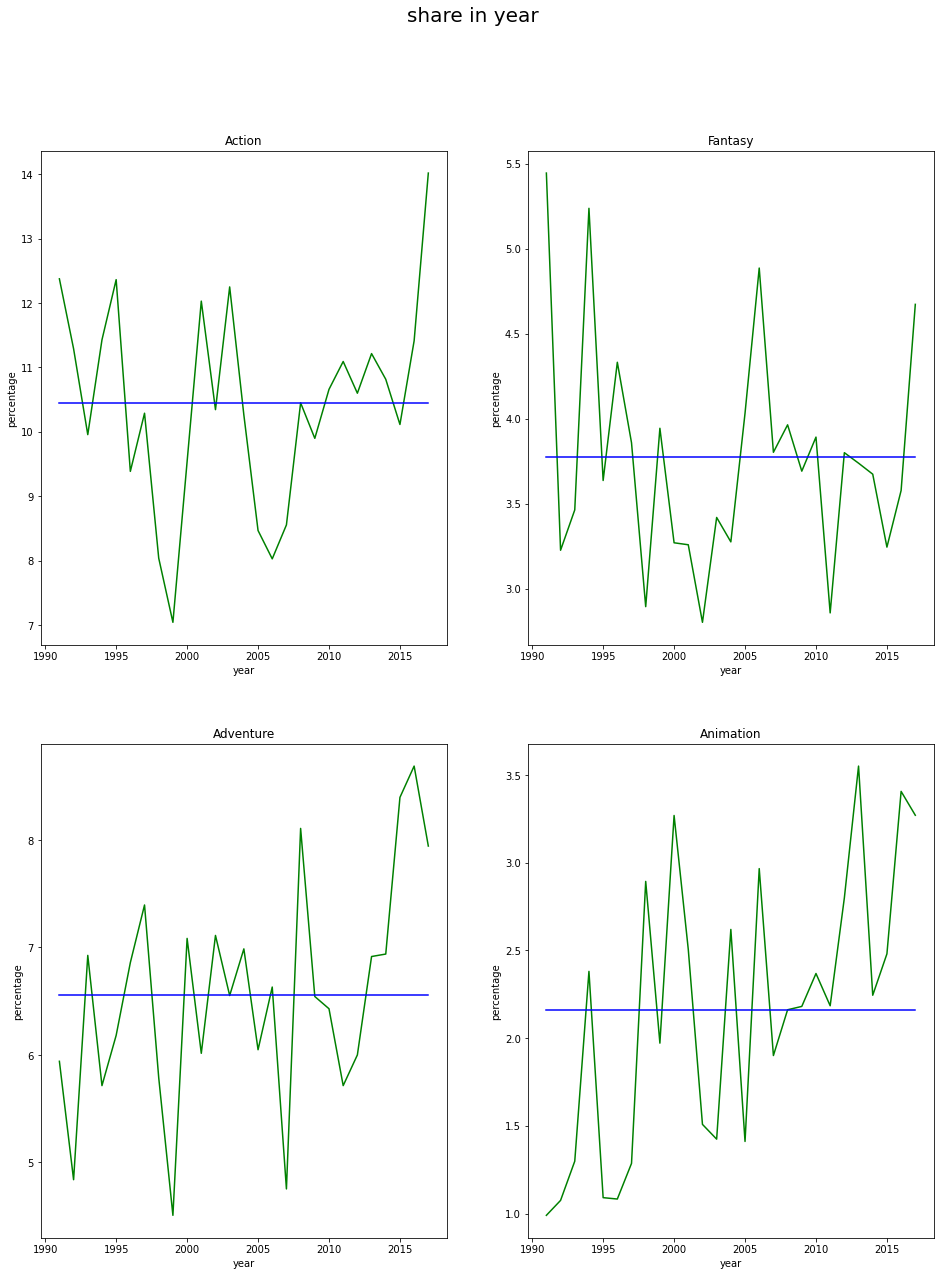

In [123]:
#define plotting region (4 rows, 5 columns)
fig, axes = plt.subplots(2, 2, figsize= (16,20))

plt.suptitle('share in year', fontsize= 20)

genres_names = ['Action', 'Fantasy', 'Adventure', 'Animation']
g_index = 0
for i in range(2):
    for j in range(2):
        g = genres_names[g_index]
        axes[i, j].set_xlabel('year')
        axes[i, j].set_ylabel('percentage')
        axes[i, j].set_title(g)
        share = 100 * (trend_agg[trend_agg.genre == g].reset_index().num_movies / movie_peryear.num_movies)
        h = 27 * [np.mean(share)]
        sns.lineplot(x= movie_peryear.release_year, y= share, color= 'g', ax= axes[i,j])
        sns.lineplot(x= movie_peryear.release_year, y= h, color= 'b', ax= axes[i,j])
        g_index += 1

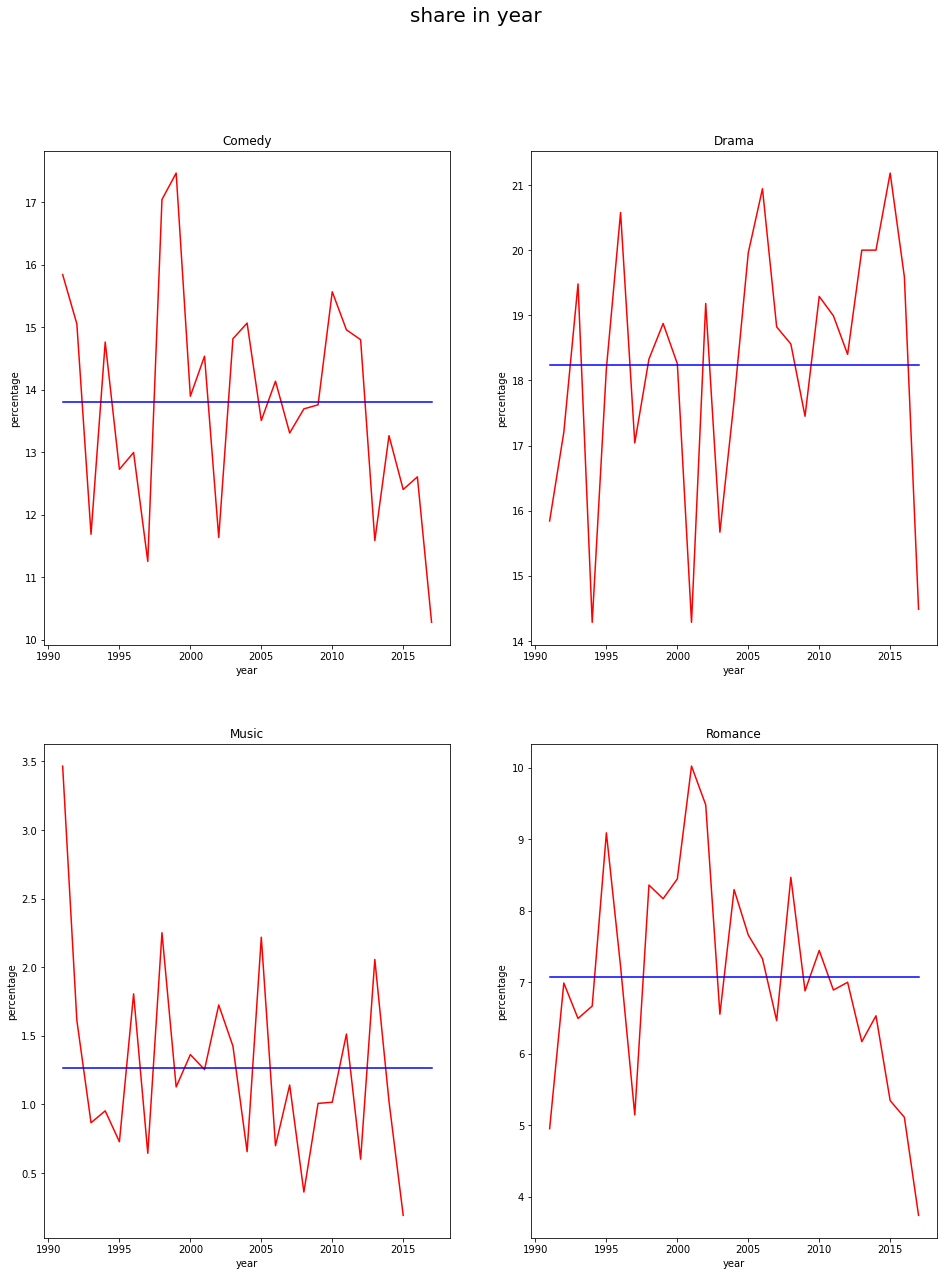

In [125]:
#define plotting region (4 rows, 5 columns)
fig, axes = plt.subplots(2, 2, figsize= (16,20))

plt.suptitle('share in year', fontsize= 20)

genres_names = ['Comedy', 'Drama', 'Music', 'Romance']
g_index = 0
for i in range(2):
    for j in range(2):
        g = genres_names[g_index]
        axes[i, j].set_xlabel('year')
        axes[i, j].set_ylabel('percentage')
        axes[i, j].set_title(g)
        share = 100 * (trend_agg[trend_agg.genre == g].reset_index().num_movies / movie_peryear.num_movies)
        h = 27 * [np.mean(share)]
        sns.lineplot(x= movie_peryear.release_year, y= share, color= 'r', ax= axes[i,j])
        sns.lineplot(x= movie_peryear.release_year, y= h, color= 'b', ax= axes[i,j])
        g_index += 1

### Conclusion
1. Animation movies share in the yearly movies is increasing, it is usually funded by big companies.
2. Action and Adventure movies are somewhat costly yet they attract audience in a stable manner, so these movies have consistent audience.
3. Fantasy movies have very high variation in the revenue and they are unpredictable, but they present high risk high reward.
4. the interest in romance movies is decreasing, but a sudden spike could happen which make it a good investment.
5. Musicals impose a great risk and have a great element of randomness

### Limitations
1. Dataset has no headlining genres, no limit to how many genres a movie can have and no special genre that can enclose a movie
2. Dataset integrity is not guaranteed, as there were many rating for movies which are not in the dataset
3. Data stops at 2017, so we can not predict the future of the industry based on this data alone
